In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [30]:
df = pd.read_csv(r'1234875_114104.csv', parse_dates = ['historybegdate'], index_col = ['historybegdate'])
df.head()


,partid,locid,historyamount
historybegdate,,,
2015-07-04,1234875,114104,931
2015-07-11,1234875,114104,988
2015-07-18,1234875,114104,66
2015-07-25,1234875,114104,891
2015-08-01,1234875,114104,1010


In [31]:
df = df.drop(['locid'],axis=1)
df = df.drop(['partid'],axis=1)

df

,historyamount
historybegdate,
2015-07-04,931
2015-07-11,988
2015-07-18,66
2015-07-25,891
2015-08-01,1010
2015-08-08,1181
2015-08-15,996
2015-08-22,1016
2015-08-29,1108


In [141]:
df

,historyamount
historybegdate,
2018-03-31,20
2018-04-07,26
2018-04-14,36
2018-04-21,27


In [32]:
df = df.iloc[3:]

In [33]:
df

,historyamount
historybegdate,
2015-07-25,891
2015-08-01,1010
2015-08-08,1181
2015-08-15,996
2015-08-22,1016
2015-08-29,1108
2015-09-05,1023
2015-09-12,1159
2015-09-19,983


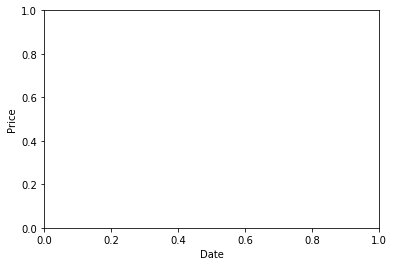

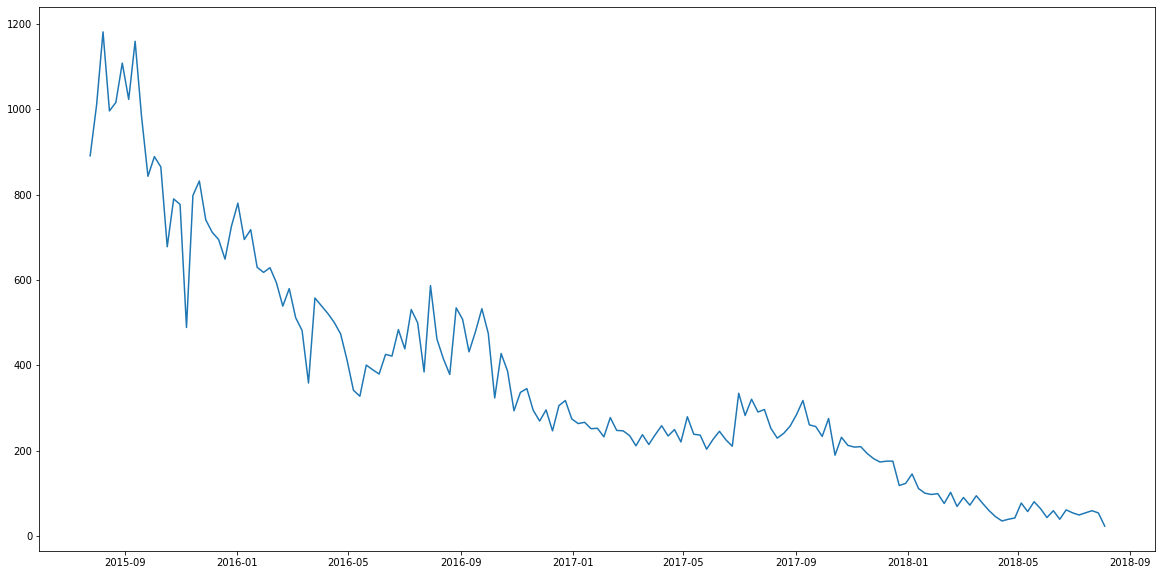

In [34]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(20,10))
plt.plot(df)

In [10]:
rolling_mean = df.rolling(window = 4).mean()
rolling_std = df.rolling(window = 4).std()
print(rolling_mean.head(20))
print(len(rolling_mean))

                historyamount
historybegdate               
2015-07-25                NaN
2015-08-01                NaN
2015-08-08                NaN
2015-08-15            1019.50
2015-08-22            1050.75
2015-08-29            1075.25
2015-09-05            1035.75
2015-09-12            1076.50
2015-09-19            1068.25
2015-09-26            1002.00
2015-10-03             968.50
2015-10-10             895.00
2015-10-17             818.75
2015-10-24             805.50
2015-10-31             777.50
2015-11-07             683.50
2015-11-14             713.50
2015-11-21             724.00
2015-11-28             715.00
2015-12-05             770.75
159


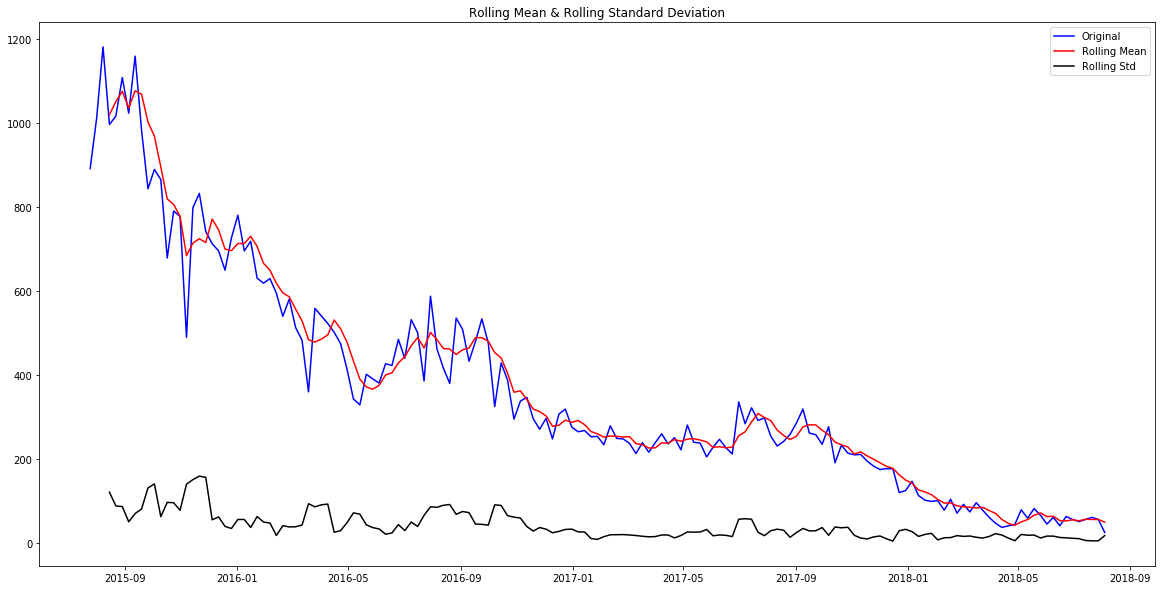

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()


In [12]:
result = adfuller(df['historyamount'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('No. OF Lags USed: {}'.format(result[2]))
print('No. OF Observations USed: {}'.format(result[3]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.87065276813743
p-value: 0.048868662306448776
No. OF Lags USed: 2
No. OF Observations USed: 156
Critical Values:
	1%: -3.4729792729247793
	5%: -2.8802520918255534
	10%: -2.5767469641683105


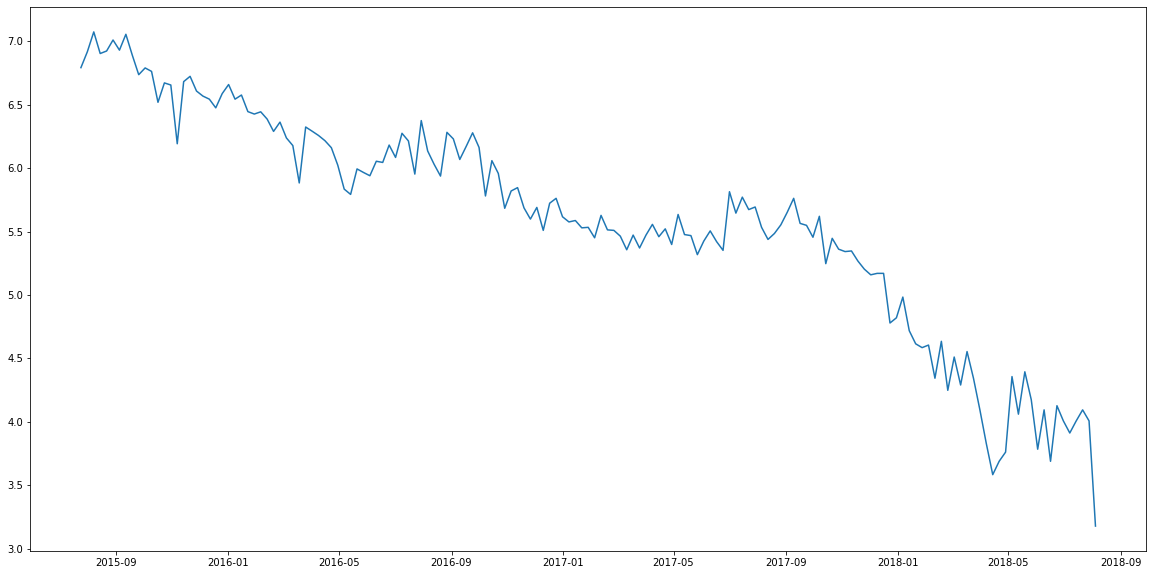

In [13]:
df_log = np.log(df)
plt.figure(figsize=(20,10))
plt.plot(df_log)

In [14]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=4).mean()
    rolling_std = timeseries.rolling(window=4).std()
    
    # rolling statistics plot
    plt.figure(figsize=(20,10))
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['historyamount'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('No. OF Lags USed: {}'.format(result[2]))
    print('No. OF Observations USed: {}'.format(result[3]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

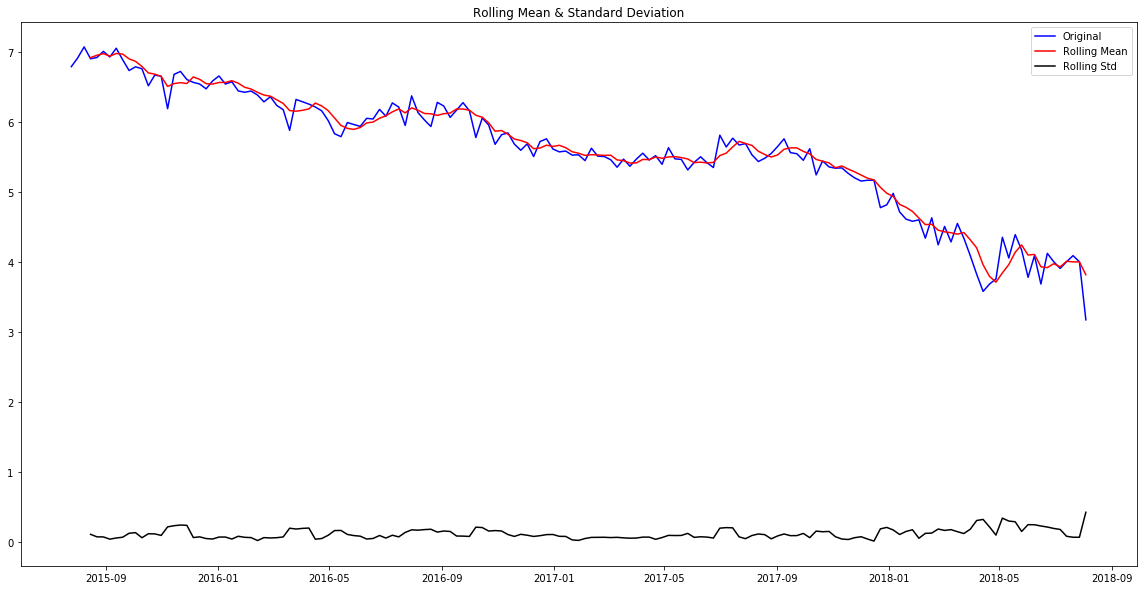

ADF Statistic: 0.8580750101274959
p-value: 0.9925180612862415
No. OF Lags USed: 6
No. OF Observations USed: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [15]:
#Taking Data with log scale 
get_stationarity(df_log)
#Can see data nt ststionary with p value and ADF Statistics 

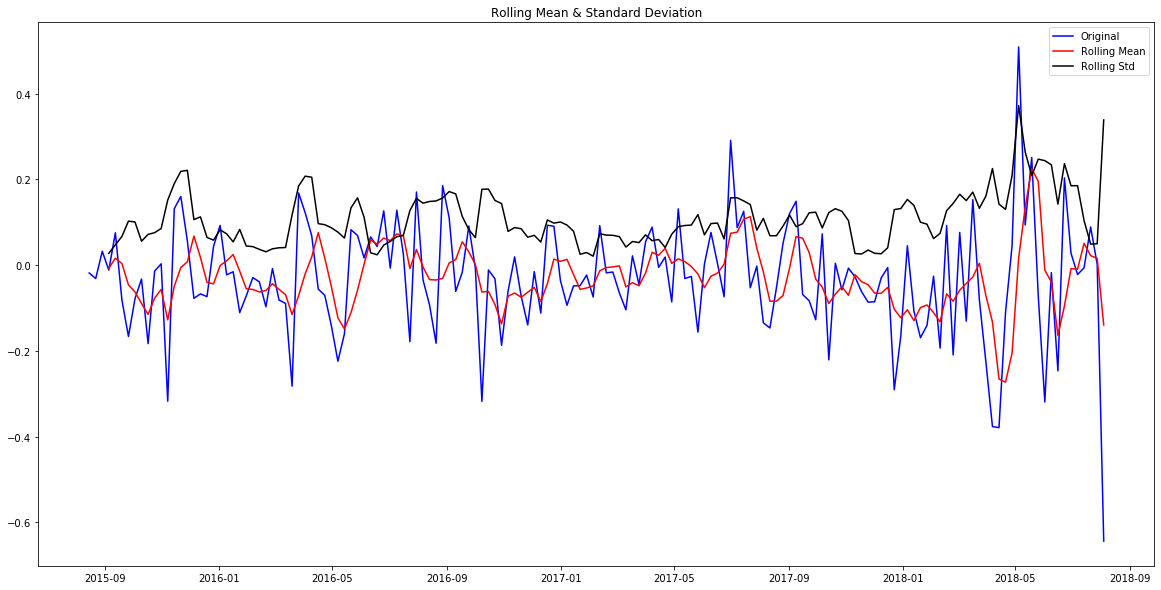

ADF Statistic: -4.544039594896979
p-value: 0.00016358425423684705
No. OF Lags USed: 6
No. OF Observations USed: 149
Critical Values:
	1%: -3.4750180242954167
	5%: -2.8811408028842043
	10%: -2.577221358046935


In [16]:
#Deducting the mean of log values from log data set 
rolling_mean = df_log.rolling(window=4).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)
# This is giving us good  results as p value is extremely low and hence data is quite stationary 

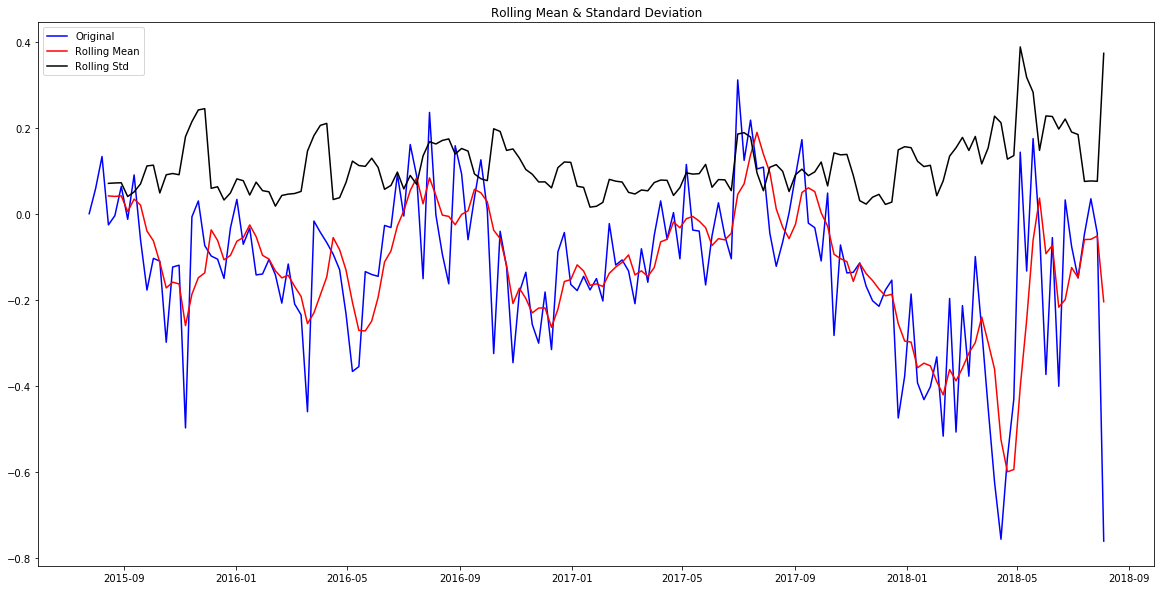

ADF Statistic: -2.382716105151041
p-value: 0.14667419937607928
No. OF Lags USed: 6
No. OF Observations USed: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [17]:
#Subtracting exponential decay mean from log data 
rolling_mean_exp_decay = df_log.ewm(halflife=5, min_periods=0, adjust=True).mean()
df_log_exp_decay = df_log - rolling_mean_exp_decay
get_stationarity(df_log_exp_decay)
#THis looks like best result as our p value is low and from adf statistics we can say that we are 95% sure that 
#data is stationary

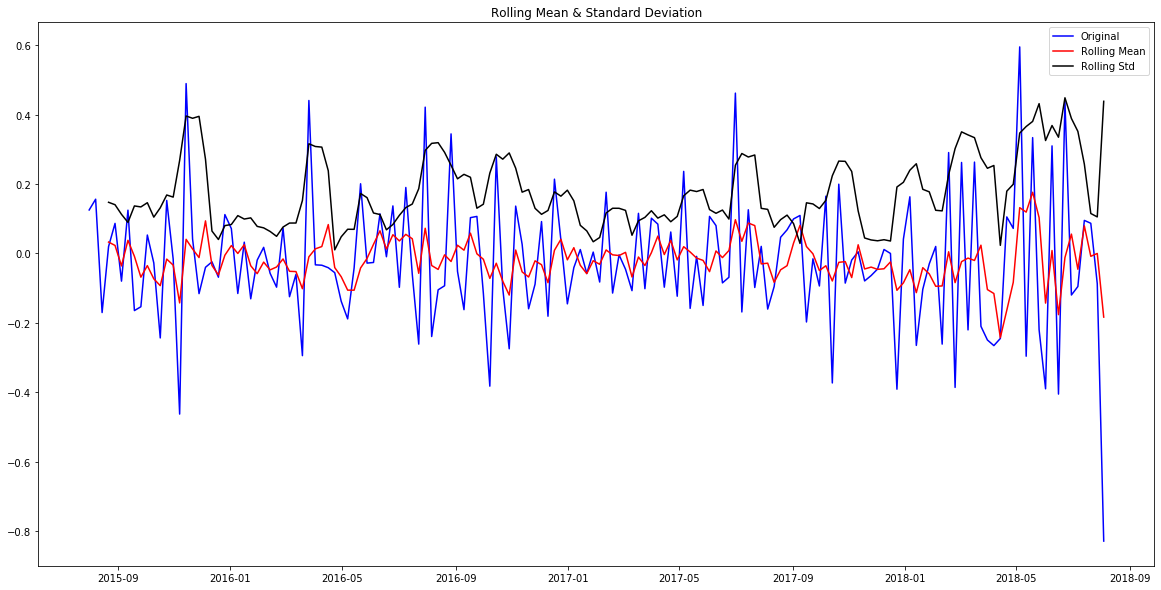

ADF Statistic: -7.892964251083561
p-value: 4.3863528242784e-12
No. OF Lags USed: 5
No. OF Observations USed: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [19]:
df_log_shift = df_log - df_log.shift()
df_log_shift.dropna(inplace=True)
get_stationarity(df_log_shift)
#Very much staionary as p value is extremely low and 99% confidence that data is staionary 

In [20]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_shift, nlags=20)
lag_pacf = pacf(df_log_shift, nlags=20, method='ols')#ordinary least square method


c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Autocorrelation Function')

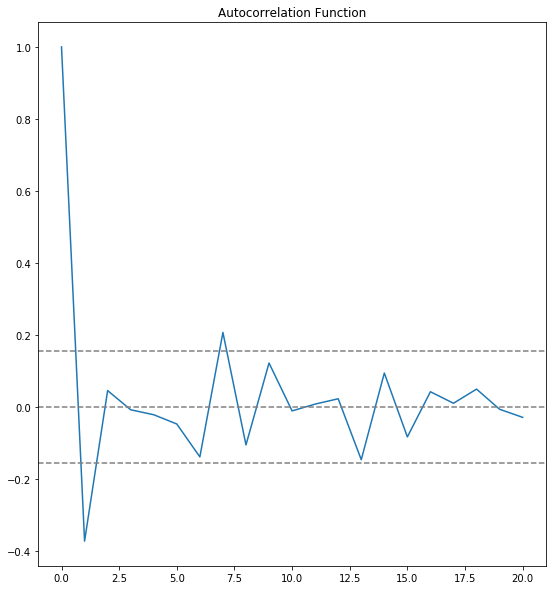

In [21]:
#Plot ACF: 
plt.figure(figsize=(20,10))
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#q= The lag value where the ACF chart crosses the upper confidence interval for the first time.
#If you notice closely, in this case q=1.

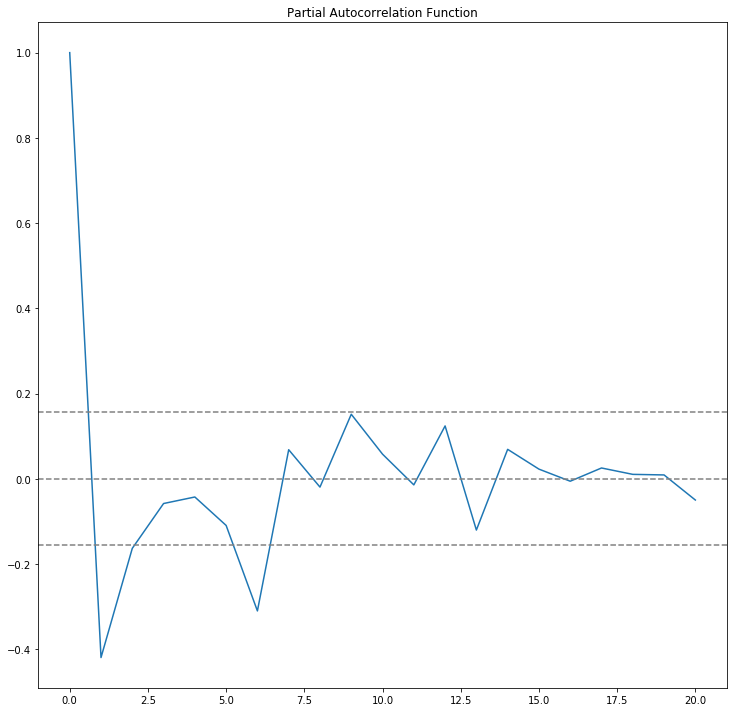

In [22]:
#Plot PACF:
plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#p – The lag value where the PACF chart crosses the upper confidence interval for the first time. 
#If you notice closely, in this case p=1.

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


aic value for this model is  -93.15409605511792
Plotting AR Model


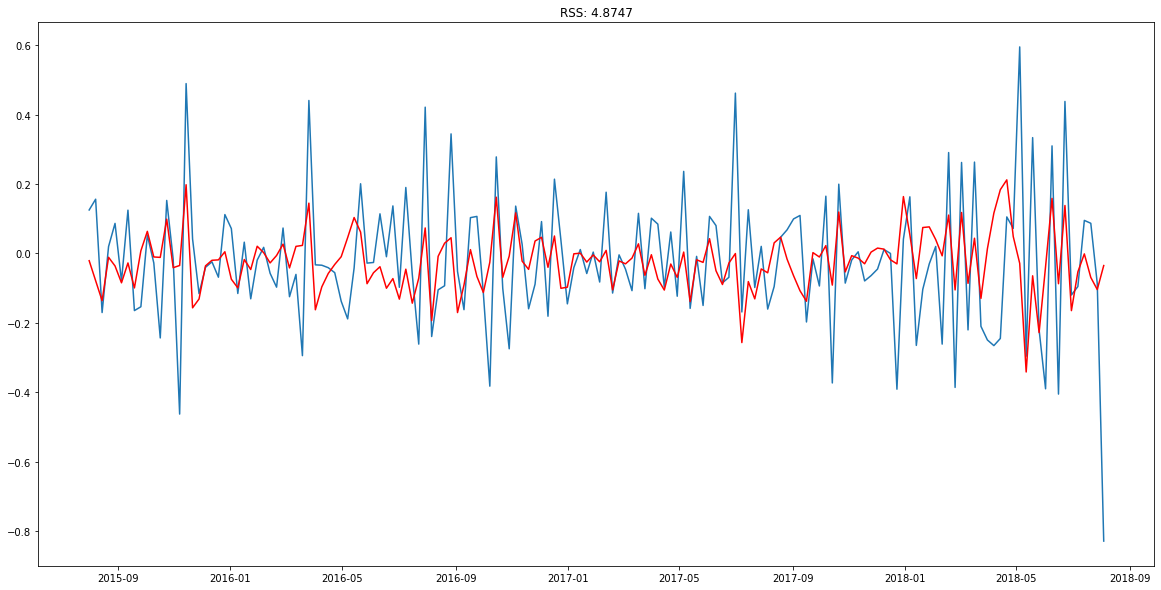

In [23]:
# Applying ARIMA model
decomposition = seasonal_decompose(df_log) 
model = ARIMA(df_log, order=(1,1,1))# (p,d,q)
results = model.fit()
print('aic value for this model is ',results.aic)
plt.figure(figsize=(20,10))
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')
#plt.title(sum(results.fittedvalues-df_log_shift['historyamount'])**2)
plt.title('RSS: %.4f'% sum((results.fittedvalues-df_log_shift['historyamount'])**2))
print('Plotting AR Model')

In [24]:
df_log_forecast = results.forecast(steps=52)[0]
print(df_log_forecast)

[3.56404445 3.56879002 3.54952904 3.5287564  3.50788858 3.48701476
 3.46614056 3.44526633 3.42439211 3.40351789 3.38264366 3.36176944
 3.34089521 3.32002099 3.29914676 3.27827254 3.25739832 3.23652409
 3.21564987 3.19477564 3.17390142 3.15302719 3.13215297 3.11127875
 3.09040452 3.0695303  3.04865607 3.02778185 3.00690762 2.9860334
 2.96515918 2.94428495 2.92341073 2.9025365  2.88166228 2.86078805
 2.83991383 2.8190396  2.79816538 2.77729116 2.75641693 2.73554271
 2.71466848 2.69379426 2.67292003 2.65204581 2.63117159 2.61029736
 2.58942314 2.56854891 2.54767469 2.52680046]


In [35]:
final_prediction = np.exp(df_log_forecast)
print(final_prediction)
rng = pd.date_range(start = "9/22/2018",end = "9/20/2019",freq='W')
csv_data = pd.Series(final_prediction,index=rng)
print(type(csv_data))
print(csv_data)

[35.30570079 35.47364479 34.79692583 34.08155758 33.37771885 32.68821958
 32.01295154 31.35163233 30.70397453 30.06969594 29.4485202  28.84017663
 28.24440013 27.6609311  27.0895153  26.52990373 25.98185254 25.44512292
 24.91948099 24.4046977  23.90054873 23.4068144  22.92327957 22.44973354
 21.98596996 21.53178675 21.08698599 20.65137386 20.22476055 19.80696016
 19.39779064 18.99707369 18.60463469 18.22030264 17.84391008 17.47529298
 17.11429072 16.760746   16.41450476 16.07541613 15.74333234 15.41810869
 15.09960347 14.78767789 14.48219603 14.18302477 13.89003375 13.60309529
 13.32208438 13.04687855 12.77735788 12.51340494]
<class 'pandas.core.series.Series'>
2018-09-23    35.305701
2018-09-30    35.473645
2018-10-07    34.796926
2018-10-14    34.081558
2018-10-21    33.377719
2018-10-28    32.688220
2018-11-04    32.012952
2018-11-11    31.351632
2018-11-18    30.703975
2018-11-25    30.069696
2018-12-02    29.448520
2018-12-09    28.840177
2018-12-16    28.244400
2018-12-23    27.6

In [36]:
import os
path=r'C:\Users\80071\Desktop\PTC_Forecast'
csv_data.to_csv(os.path.join(path,r'1234875_114104_forecast.csv'))

c:\users\80071\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


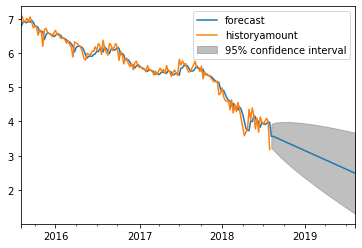

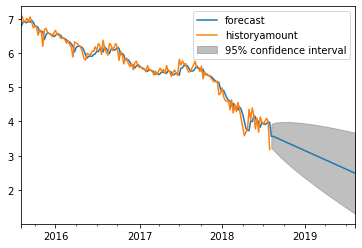

In [51]:
results.plot_predict(1,212)